In [10]:
SMALL_SIZE, MEDIUM_SIZE = 9, 12
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
# PROJECT_PATH = "/rapids/notebooks/host"
CONFIG_PATH = f"{PROJECT_PATH}/config_ant.yaml"

In [11]:
import sys
import numpy as np
from glob import glob
import random, matplotlib
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

sys.path.append(PROJECT_PATH)
from utils.data import Dataset


In [17]:
import utils.figure as ufigure
%load_ext autoreload
%autoreload 1
%aimport utils.data
%aimport utils.figure

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...


  3%|▎         | 4/141 [00:00<00:03, 39.83it/s]

Finished loading INFO


100%|██████████| 141/141 [00:08<00:00, 16.87it/s]


In [28]:
# configuration
INFO = Data.info
INFO_values = Data.info_values
config = Data.config
skeleton = config['skeleton']
skeleton_color= config['skeleton_color']

# features
bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']

angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

# embeddings
all_embed = Data.data_obj['all_embeddings']
all_postural_embed = Data.data_obj['all_postural_embeddings']
all_kinematic_embed = Data.data_obj['all_kinematic_embeddings']

In [29]:
num_fr,_,_ = bp.shape
DLC_data = np.copy(bp)


<hr><hr>

In [30]:
good_fr, good_ax = np.where(~np.isnan(DLC_data[:,config['bp_center'],0:2]))
good_unique_fr = np.unique(good_fr)
DLC_data[good_unique_fr,:,0:2] -= DLC_data[good_unique_fr,config['bp_center'],0:2][:,np.newaxis,:]

<hr><hr>

In [31]:
bp_axis = DLC_data[:,config['bp_scale'],0:2]
bad_fr, bad_bp, bad_ax = np.where(np.isnan(bp_axis))
unique_bad_fr = np.unique(bad_fr)

good_idx = np.array([True]*num_fr)
good_idx[unique_bad_fr] = False
good_bp_axis = bp_axis[good_idx,:,:]

x_d = good_bp_axis[0,0] - good_bp_axis[1,0]
y_d = good_bp_axis[0,1] - good_bp_axis[1,1]
dist = np.sqrt(x_d**2+y_d**2)
scale_factor = np.median(dist)
DLC_data[:,:,0:2] /= scale_factor

In [32]:
print(DLC_data.shape)
nan_fr,_,_ = np.where(np.isnan(DLC_data))
np.unique(nan_fr).shape

(1872138, 30, 3)


(174253,)

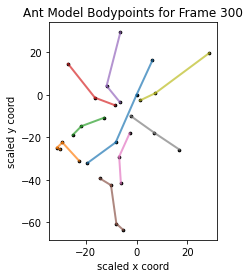

In [33]:
ufigure.ant_model(DLC_data,skeleton=config['skeleton'], 
                  skeleton_color=config['skeleton_color'],
                 fr=300)

<hr><hr>

In [34]:
from helper import _rotational

In [35]:
data = DLC_data[:,:,0:2]
axis_bp = config['bp_rotate']

rot_data = np.copy(data)
num_bp = rot_data.shape[1]
axis_vector = rot_data[:,axis_bp,:]
angle_list = np.sign(axis_vector[:,0]) * np.pi/2 - np.arctan( axis_vector[:,1]/axis_vector[:,0] )

<ipython-input-35-75ae4a50e5ef>:7: RuntimeWarning: divide by zero encountered in true_divide
  angle_list = np.sign(axis_vector[:,0]) * np.pi/2 - np.arctan( axis_vector[:,1]/axis_vector[:,0] )
<ipython-input-35-75ae4a50e5ef>:7: RuntimeWarning: invalid value encountered in true_divide
  angle_list = np.sign(axis_vector[:,0]) * np.pi/2 - np.arctan( axis_vector[:,1]/axis_vector[:,0] )


In [36]:
nan_fr,_,_ = np.where(np.isnan(rot_data))
np.unique(nan_fr).shape

(174253,)

In [37]:
rot_data.shape

(1872138, 30, 2)

In [38]:
nan_fr, nan_bp = np.where(np.isnan(axis_vector))
unique_nan_fr = np.unique(nan_fr)

zero_fr, = np.where(axis_vector[:,0]==0)


In [39]:
len(zero_fr)

2201

In [40]:
len(unique_nan_fr)

52958

In [41]:
axis_vector[:,0].shape

(1872138,)

In [42]:
np.pi/2-np.arctan(0.5/0.0001)

0.00019999999733322227